<a href="https://colab.research.google.com/github/IoanaAndra/HackMed-2021---1000-Genomes-Project-/blob/main/HackMed2021_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [431]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# **Modules**

In [441]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Population & genotypes**

In [433]:
population = pd.read_excel('20130606_sample_info (2).xlsx', sheet_name='Sample Info', index_col=3)
population = population.groupby("Population Description").count()

gender = pd.read_excel('20130606_sample_info (2).xlsx', sheet_name='Sample Info', index_col=4)
gender_nr = gender.groupby("Gender").count()


omni = pd.read_excel('20130606_sample_info (2).xlsx', sheet_name='HD Genotypes', index_col=3)
omni_nr = omni.pivot_table(index = ['Has Omni Genotypes'], aggfunc ='size')
omni_nr = pd.array(omni_nr, dtype=float)

axiom = pd.read_excel('20130606_sample_info (2).xlsx', sheet_name='HD Genotypes', index_col=4)
axiom_nr = axiom.pivot_table(index = ['Has Axiom Genotypes'], aggfunc ='size')
axiom_nr = pd.array(axiom_nr, dtype=float)

affy = pd.read_excel('20130606_sample_info (2).xlsx', sheet_name='HD Genotypes', index_col=5)
affy_nr = affy.pivot_table(index = ['Has Affy 6.0 Genotypes'], aggfunc ='size')
affy_nr = pd.array(affy_nr, dtype=float)

exome = pd.read_excel('20130606_sample_info (2).xlsx', sheet_name='HD Genotypes', index_col=6)
exome_nr = exome.pivot_table(index = ['Has Exome/LOF Genotypes'], aggfunc ='size')
exome_nr = pd.array(exome_nr, dtype=float)

print(gender_nr)
# print(omni_nr)
# print(axiom_nr)
# print(affy_nr)
# print(exome_nr)
# print(gender)

# print (gender)
# print(omni)

        Sample  Family ID  ...  Third Order  Other Comments
Gender                     ...                             
female    1760       1760  ...           16               0
male      1740       1740  ...           31               0

[2 rows x 14 columns]


# **PLOTS**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


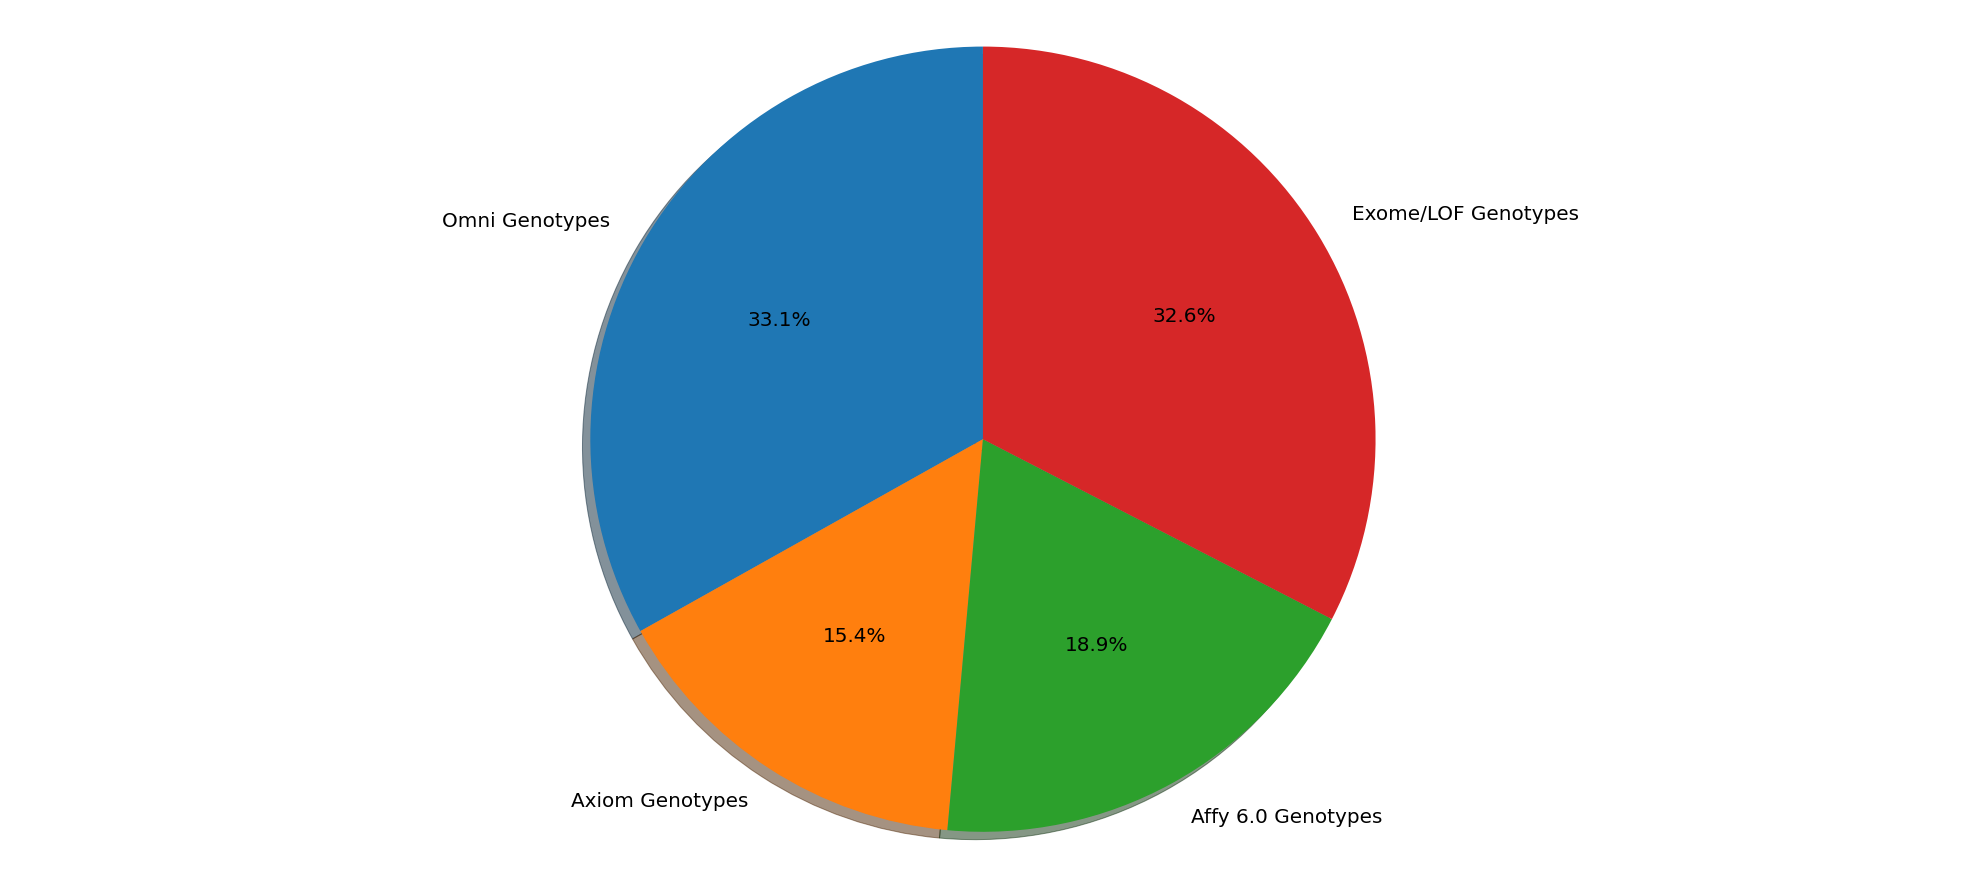

In [434]:
labels = 'Omni Genotypes', 'Axiom Genotypes', 'Affy 6.0 Genotypes', 'Exome/LOF Genotypes'
sizes = [omni_nr, axiom_nr, affy_nr, exome_nr]
explode = (0, 0, 0, 0)  


fig1, ax1 = plt.subplots(figsize=(35, 16))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20},
        shadow=True, startangle=90)

ax1.axis('equal')  

plt.show()

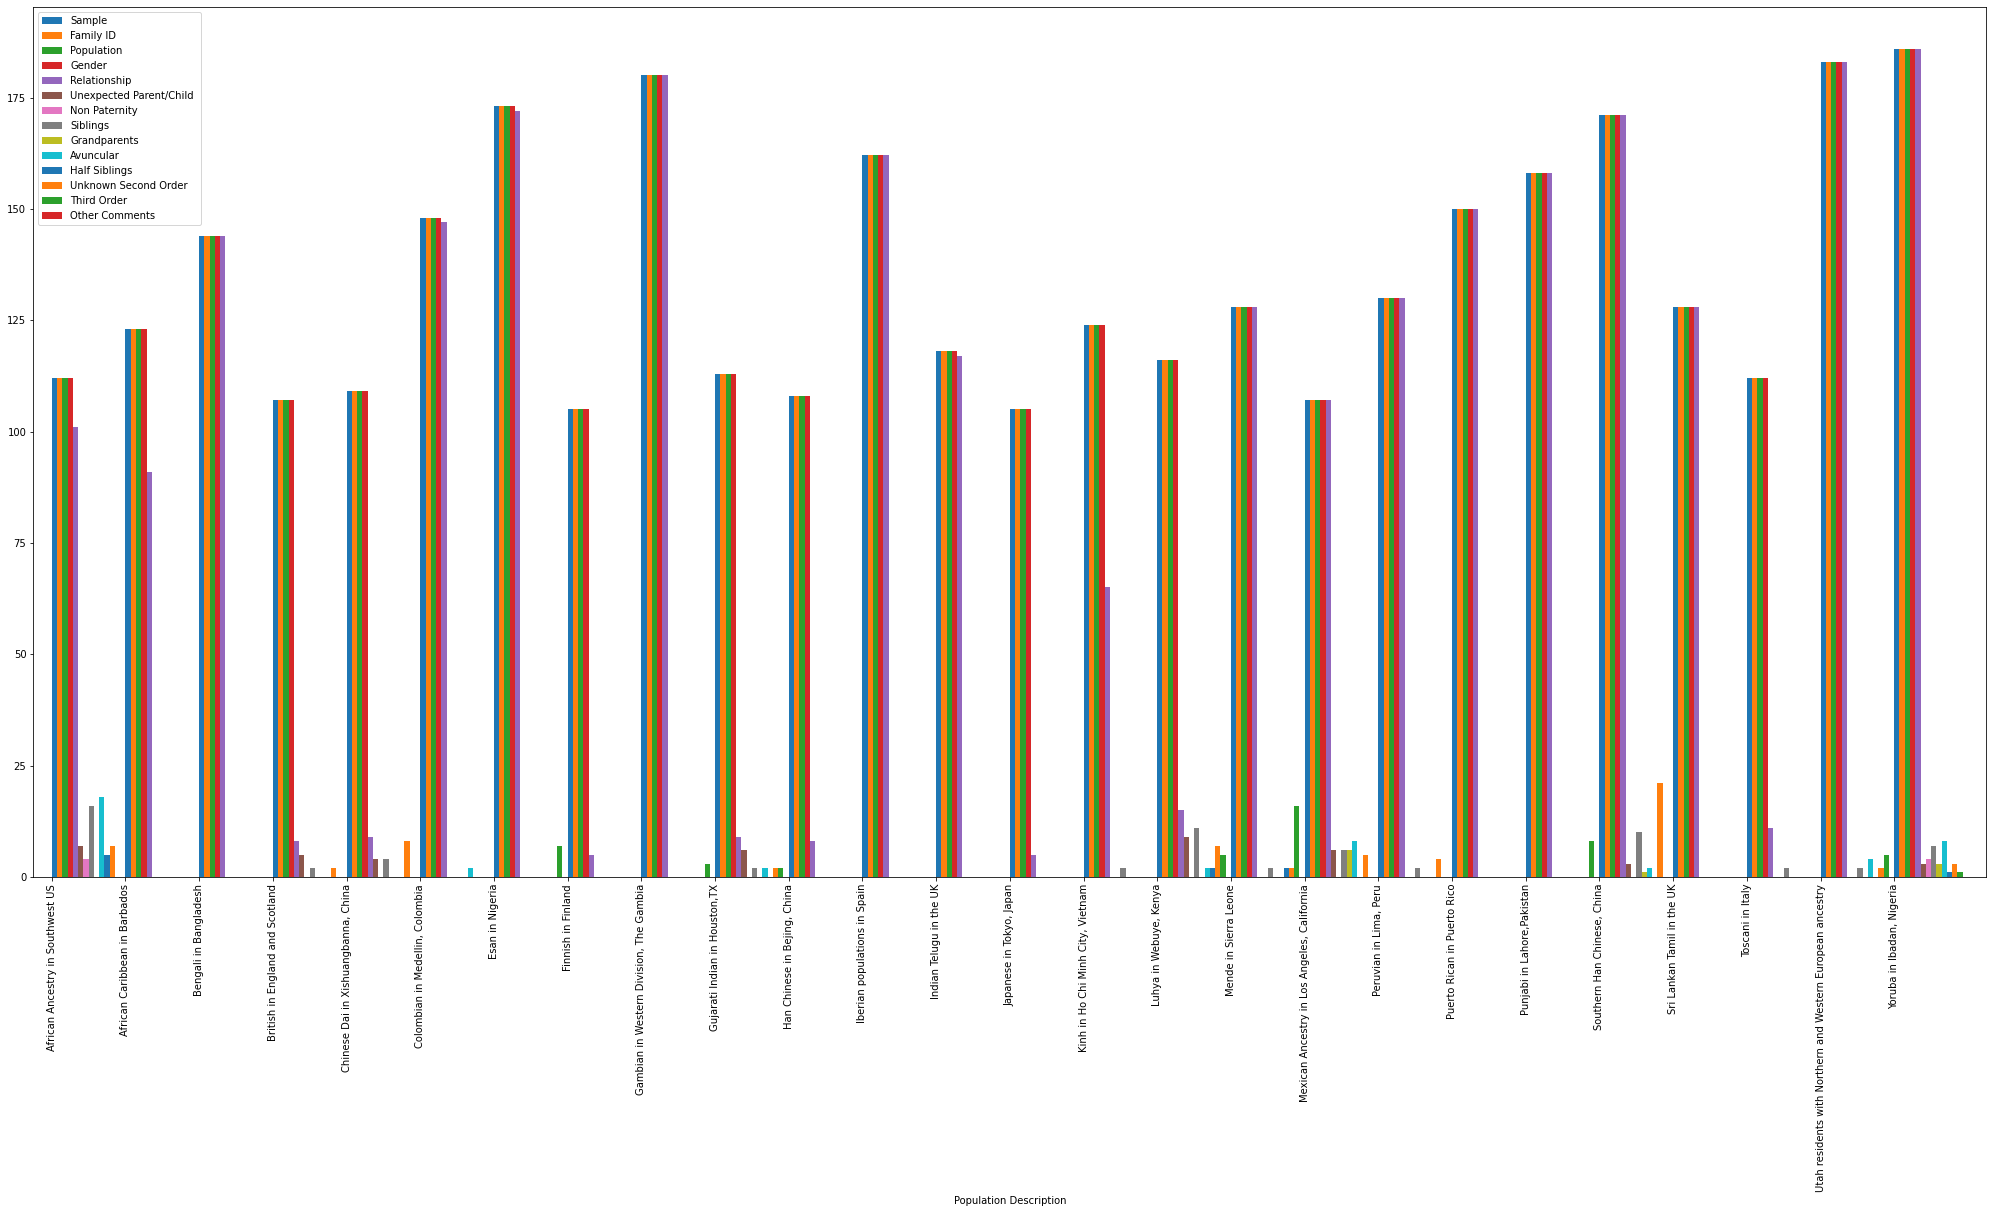

In [435]:
# .plot(kind = "bar")
# .unstack()
pd = population.groupby(['Population Description']).mean('Samples').plot.bar(figsize=(35, 16), width=1,align='edge')

plt.show()

No handles with labels found to put in legend.


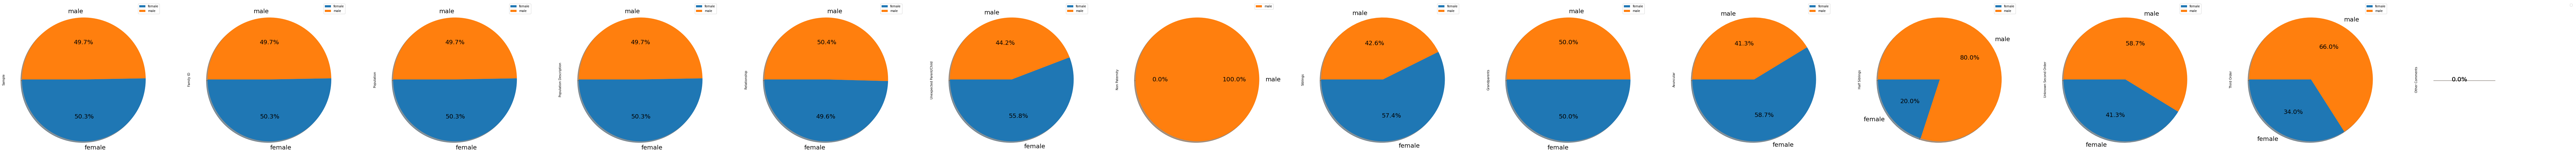

In [438]:
gender_nr = pd.read_excel('20130606_sample_info (2).xlsx', sheet_name='Sample Info', index_col=4)
gender_nr = gender_nr.groupby(['Gender']).count().plot.pie(subplots=True,shadow=True,startangle=180,autopct='%1.1f%%',figsize=(150, 16),textprops={'fontsize': 20})


In [ ]:
# g = gender.groupby(by='Gender')
# g = g.groups.keys()

# print(g)


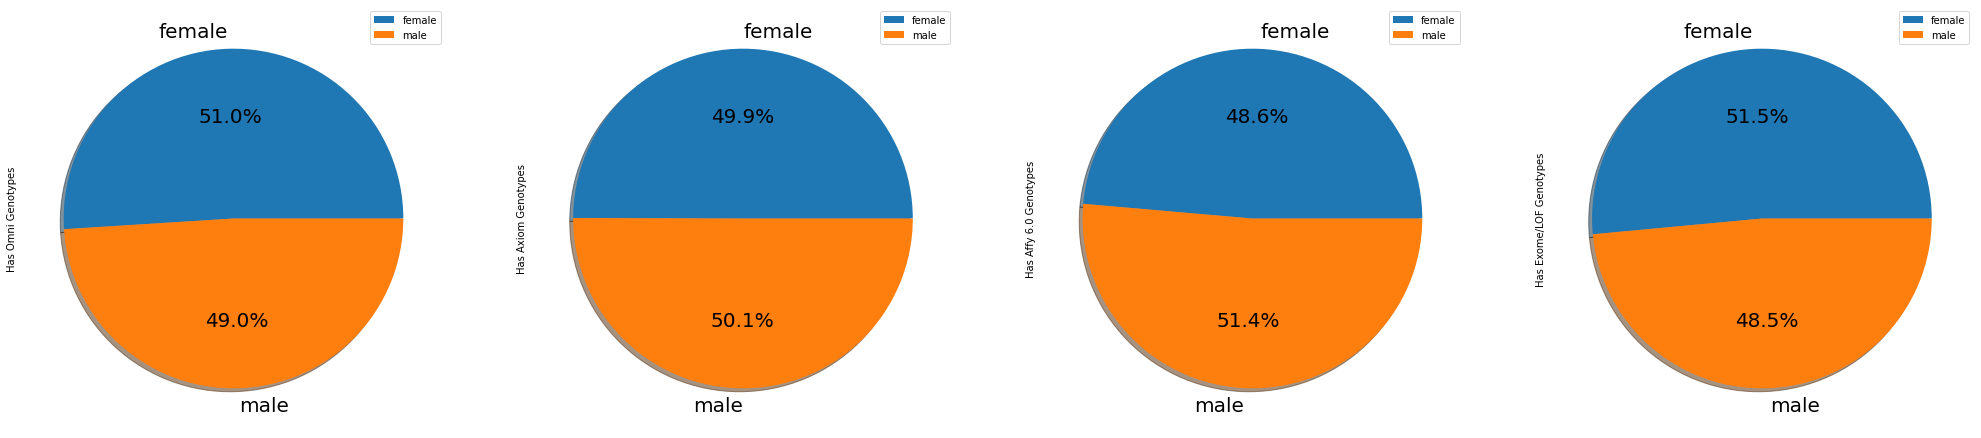

In [439]:
gender_nr = pd.read_excel('20130606_sample_info (2).xlsx', sheet_name='HD Genotypes')
pd = gender_nr.groupby(['Gender']).sum('Has Omni Genotypes').plot.pie(subplots=True,figsize=(35, 16),autopct='%1.1f%%',textprops={'fontsize': 20},shadow=True)

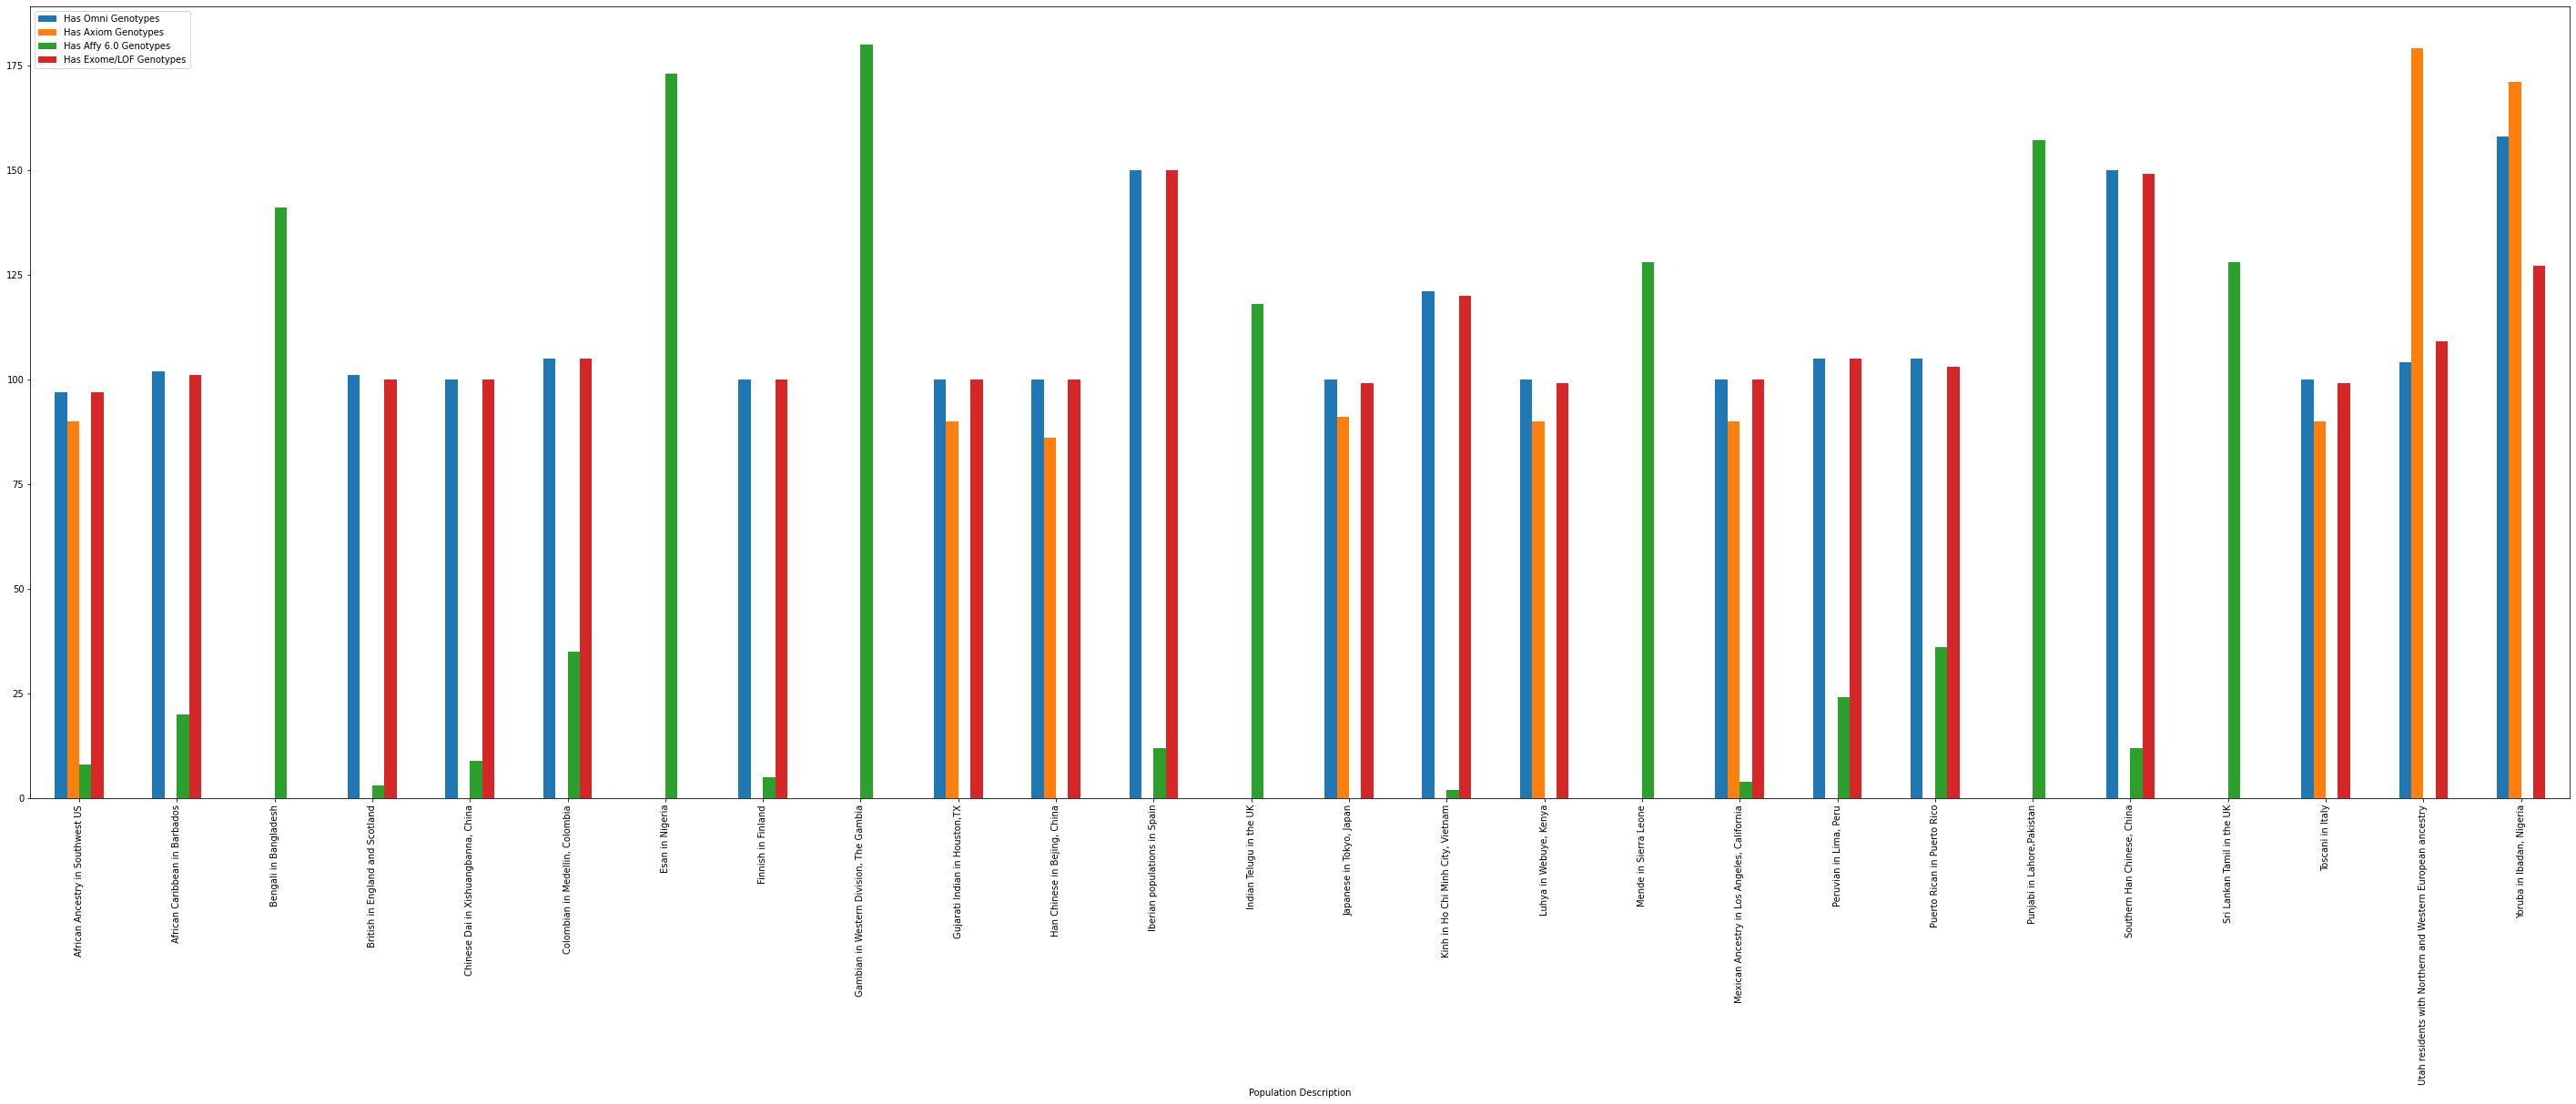

In [442]:
gender_nr = pd.read_excel('20130606_sample_info (2).xlsx', sheet_name='HD Genotypes')
#pd = gender_nr.groupby(['Population Description']).sum('Has Omni Genotypes').plot.pie(subplots=True,figsize=(50, 16),autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',shadow=True, labeldistance=None,pctdistance=0.90)

pd = gender_nr.groupby(['Population Description']).sum('Has Omni Genotypes').plot.bar(figsize=(50, 16),align='center')

